In [156]:
import datetime
from datetime import timedelta
import matplotlib.pyplot as mt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [157]:
data = pd.read_csv("POS_transactions_svm.csv")
data.head()
#print(df)



df = pd.DataFrame(data)
df['BeginDateTime'] = pd.to_datetime(df['BeginDateTime'], format='%Y-%m-%d %H:%M:%S') # convert the date/time into datetime64
df['EndDateTime'] = pd.to_datetime(df['EndDateTime'], format='%Y-%m-%d %H:%M:%S')
data.head(6)

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount,OperatorID
0,1,1.900000e+13,2019-02-23 14:35:12,2019-02-23 14:35:12,0,2,1,False,False,1.79,101
1,1,1.900000e+11,2019-02-13 07:50:14,2019-02-13 07:50:23,9,17,3,True,False,13.19,101
2,1,1.900000e+11,2019-02-13 07:50:40,2019-02-13 07:51:01,21,209,6,True,False,21.20,101
3,1,1.900000e+11,2019-02-13 07:54:30,2019-02-13 07:55:05,35,16,1,True,False,106.20,101
4,1,1.900000e+11,2019-02-13 07:55:21,2019-02-13 07:55:27,6,17,1,True,False,106.20,101
5,1,1.900000e+12,2019-02-13 07:55:44,2019-02-13 07:55:51,7,30,1,True,False,106.20,101


In [158]:
#create additional features from the Begindate/time
df['BeginYear'] = df['BeginDateTime'].dt.year
df['BeginMonth'] = df['BeginDateTime'].dt.month 
df['BeginDay'] = df['BeginDateTime'].dt.day
#extract the time features
df['BeginHour'] = df['BeginDateTime'].dt.hour
df['BeginMinute'] = df['BeginDateTime'].dt.minute
df['BeginSecond'] = df['BeginDateTime'].dt.second

#create additional features for EndDateTime
df['EndYear'] = df['EndDateTime'].dt.year
df['EndMonth'] = df['EndDateTime'].dt.month 
df['EndDay'] = df['EndDateTime'].dt.day
#extract the time features
df['EndHour'] = df['EndDateTime'].dt.hour
df['EndMinute'] = df['EndDateTime'].dt.minute
df['EndSecond'] = df['EndDateTime'].dt.second


#df.head(5)

In [159]:
#print(df.corr())
#print(df.dtypes)
# using label encoder on categorical variables
df[['TNcard','TNcash']] = df[['TNcard','TNcash']].apply(LabelEncoder().fit_transform)
df = df.drop(columns=['BeginDateTime'], axis=0)
df = df.drop(columns=['EndDateTime'], axis=3)
#print(df.head(5))


In [160]:
X=df[['WorkstationGroupID','TranID','TranTime','BreakTime','ArtNum','TNcash','TNcard','ArtNum','Amount','OperatorID']]

X=df.drop('WorkstationGroupID', axis=1)
X = df.iloc[:,1:-13]



y= df.iloc[:,-13]
y



0        101
1        101
2        101
3        101
4        101
        ... 
47061    606
47062    606
47063    606
47064    606
47065    606
Name: OperatorID, Length: 47066, dtype: int64

In [161]:
#split my df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)
#X_train.head(5)
#X_test.head(5)


In [162]:
# we begin the scalling
scaler = StandardScaler()
#fit the scaler to the parameters
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_train



array([[ 1.13009239,  0.55583303, -0.1074037 , ..., -1.10667439,
         1.10579245, -0.34303075],
       [ 1.13009239,  0.6780624 ,  0.38348011, ..., -1.10667439,
         1.10579245, -0.2262623 ],
       [ 1.13009239, -0.61407671,  0.0698599 , ...,  0.90360815,
        -0.90432883, -0.63539951],
       ...,
       [-0.8502849 , -0.50930868, -0.38011693, ...,  0.90360815,
        -0.90432883, -0.40595526],
       [ 1.13009239,  2.19719893,  0.39711577, ..., -1.10667439,
         1.10579245,  0.27713378],
       [ 1.13009239, -0.36961796, -0.32557428, ...,  0.90360815,
        -0.90432883,  0.57397888]])

In [163]:
dcc_t = DecisionTreeClassifier()
bagg_model = BaggingClassifier(base_estimator=dcc_t, n_estimators=75, bootstrap=True)
bagg_model = bagg_model.fit(X_train,y_train)
#X_train.head

In [164]:
#predict my model
dct_pred = bagg_model.predict(X_test)
print(dct_pred)

[125 338 332 ... 342 125 268]


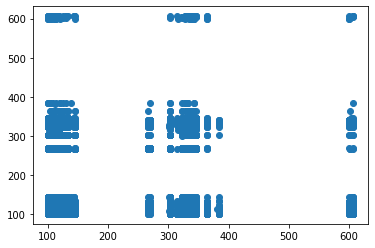

In [165]:
#plot a scatter to see pred
plt.scatter(y_test, dct_pred)

In [166]:
# plot  the residua;s/errors
residuals = y_test - dct_pred
residuals

15282      0
40077      0
3436    -228
4440       5
41058      0
        ... 
14388     14
33447     55
5231    -236
19933      8
27250      0
Name: OperatorID, Length: 14120, dtype: int64

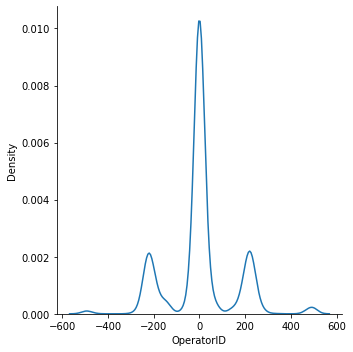

In [167]:
#plot residuals
sns.displot(residuals, kind="kde")

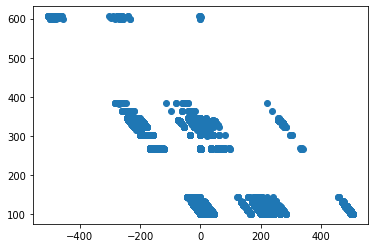

In [168]:
#scatter graph between residuals and pred
plt.scatter(residuals, dct_pred)

In [169]:
print(mean_absolute_error(y_test, dct_pred))
print(mean_squared_error(y_test, dct_pred))
print(np.sqrt(mean_absolute_error(y_test, dct_pred)))

86.97932011331444
20291.575212464588
9.326270428918221


In [170]:
#cal the R2-score
score = r2_score(y_test, dct_pred)
print(score)


-0.6364825098051787


In [171]:
#accuracy_score(y_test, reg_pred)
#confussion matrix
matrix =confusion_matrix(dct_pred, y_test)
print(matrix)
# calculate the overall acuracy
print("the accuracy score of the prediction is:")
accuracy_score(y_test, dct_pred)

[[134   4  51 ...   9   3  26]
 [  4   1   1 ...   0   0   2]
 [ 27   2  20 ...   3   4   7]
 ...
 [  1   0   1 ...   1   0   0]
 [  4   0   1 ...   0   0   1]
 [  5   0   8 ...   0   0   3]]
the accuracy score of the prediction is:


0.16076487252124647